# EDA 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

In [3]:
#Uncomment for installation.
! pip install openpyxl

# 1. Country Dataset

In [4]:
df = pd.read_excel('country.xlsx')
df.head()
df.columns
df1 = df.copy()

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
df['Economic status1'].unique()

array(['LMI', 'UMI', 'HIC', 'LI', nan, 'Notes:',
       '1 - Based upon 2010 Gross National Income',
       '2 - Based upon a 50 km coastal buffer created in GIS with global population densities24',
       '3 - Bold data were taken directly from World Bank estimates6,21',
       '4 - Bold data were taken directly from World Bank estimates6,21 ',
       '5 - Using a model developed for this study (see Supplemental Information)',
       '6 - From U.S. national litter study22', '7 - Calculated values',
       '8 - Economic status changed from 2005 to 20106; waste generation rate and %plastic were assigned using average values for the 2010 economic category '],
      dtype=object)

In [6]:
df = df[~df['Country'].isna()]
df = df.rename(columns={'Economic status1': 'Economic_status'})
df

,Country,Economic_status,Coastal population2,Waste generation rate [kg/person/day]3,% Plastic in waste stream4,% Inadequately managed waste5,% Littered waste6,Waste generation [kg/day]7,Plastic waste generation [kg/day]7,Inadequately managed plastic waste [kg/day]7,Plastic waste littered\n [kg/day]7,Mismanaged plastic waste [kg/person/day]7,Mismanaged plastic waste in 2010\n [tonnes]7,Mismanaged plastic waste in 2025\n [tonnes]7
0,Albania,LMI,2530533.0,0.77,8.95,44.667603,2.0,1948510.41,1.743917e+05,7.789658e+04,3487.833634,0.032161,2.970531e+04,6.305075e+04
1,Algeria8,UMI,16556580.0,1.20,11.95,58.069448,2.0,19867896.00,2.374214e+06,1.378693e+06,47484.271440,0.08614,5.205546e+05,1.017444e+06
2,Angola,LMI,3790041.0,0.48,12.95,70.715014,2.0,1819219.68,2.355889e+05,1.665968e+05,4711.778971,0.0452,6.252762e+04,1.367695e+05
3,Anguilla,HIC,14561.0,2.10,11.95,1.869023,2.0,30578.10,3.654083e+03,6.829564e+01,73.081659,0.009709,5.160271e+01,7.294925e+01
4,Antigua & Barbuda,HIC,66843.0,5.50,11.95,5.816355,2.0,367636.50,4.393256e+04,2.555274e+03,878.651235,0.051373,1.253383e+03,1.385281e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,USVI,HIC,134219.0,2.10,11.95,0.032200,2.0,281859.90,3.368226e+04,1.084559e+01,673.645161,0.0051,2.498391e+02,2.961482e+02
188,Vanuatu,LMI,251851.0,3.28,8.95,81.295437,2.0,826071.28,7.393338e+04,6.010446e+04,1478.667591,0.244522,2.247784e+04,3.800644e+04
189,Venezuela8,HIC,16094897.0,2.10,11.95,4.941418,2.0,33799283.70,4.039014e+06,1.995846e+05,80780.288043,0.017419,1.023332e+05,1.542428e+05
190,Vietnam8,LMI,55858245.0,0.79,12.95,85.918342,2.0,44128013.55,5.714578e+06,4.909870e+06,114291.555095,0.089945,1.833819e+06,4.172828e+06


In [7]:
# Convert economic status to numericals.
status = {
    'LI':1,
    'LMI':2,
    'UMI':3,
    'HIC':4
}
status_data = df['Economic_status'].map(status)
df_country = df.copy()
df_country['Economic_status'] = status_data
df_country

,Country,Economic_status,Coastal population2,Waste generation rate [kg/person/day]3,% Plastic in waste stream4,% Inadequately managed waste5,% Littered waste6,Waste generation [kg/day]7,Plastic waste generation [kg/day]7,Inadequately managed plastic waste [kg/day]7,Plastic waste littered\n [kg/day]7,Mismanaged plastic waste [kg/person/day]7,Mismanaged plastic waste in 2010\n [tonnes]7,Mismanaged plastic waste in 2025\n [tonnes]7
0,Albania,2,2530533.0,0.77,8.95,44.667603,2.0,1948510.41,1.743917e+05,7.789658e+04,3487.833634,0.032161,2.970531e+04,6.305075e+04
1,Algeria8,3,16556580.0,1.20,11.95,58.069448,2.0,19867896.00,2.374214e+06,1.378693e+06,47484.271440,0.08614,5.205546e+05,1.017444e+06
2,Angola,2,3790041.0,0.48,12.95,70.715014,2.0,1819219.68,2.355889e+05,1.665968e+05,4711.778971,0.0452,6.252762e+04,1.367695e+05
3,Anguilla,4,14561.0,2.10,11.95,1.869023,2.0,30578.10,3.654083e+03,6.829564e+01,73.081659,0.009709,5.160271e+01,7.294925e+01
4,Antigua & Barbuda,4,66843.0,5.50,11.95,5.816355,2.0,367636.50,4.393256e+04,2.555274e+03,878.651235,0.051373,1.253383e+03,1.385281e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,USVI,4,134219.0,2.10,11.95,0.032200,2.0,281859.90,3.368226e+04,1.084559e+01,673.645161,0.0051,2.498391e+02,2.961482e+02
188,Vanuatu,2,251851.0,3.28,8.95,81.295437,2.0,826071.28,7.393338e+04,6.010446e+04,1478.667591,0.244522,2.247784e+04,3.800644e+04
189,Venezuela8,4,16094897.0,2.10,11.95,4.941418,2.0,33799283.70,4.039014e+06,1.995846e+05,80780.288043,0.017419,1.023332e+05,1.542428e+05
190,Vietnam8,2,55858245.0,0.79,12.95,85.918342,2.0,44128013.55,5.714578e+06,4.909870e+06,114291.555095,0.089945,1.833819e+06,4.172828e+06


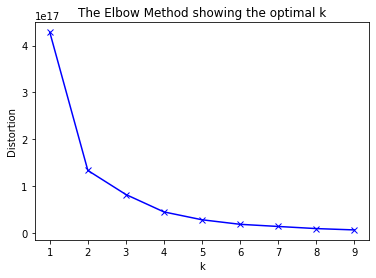

In [8]:
# Find similar countries.
df_KN = df_country.drop(columns=['Country'])
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_KN)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
km = KMeans(n_clusters=4).fit(df_KN)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0], dtype=int32)

In [10]:
df_country['Cluster'] = km.labels_
df_country

,Country,Economic_status,Coastal population2,Waste generation rate [kg/person/day]3,% Plastic in waste stream4,% Inadequately managed waste5,% Littered waste6,Waste generation [kg/day]7,Plastic waste generation [kg/day]7,Inadequately managed plastic waste [kg/day]7,Plastic waste littered\n [kg/day]7,Mismanaged plastic waste [kg/person/day]7,Mismanaged plastic waste in 2010\n [tonnes]7,Mismanaged plastic waste in 2025\n [tonnes]7,Cluster
0,Albania,2,2530533.0,0.77,8.95,44.667603,2.0,1948510.41,1.743917e+05,7.789658e+04,3487.833634,0.032161,2.970531e+04,6.305075e+04,0
1,Algeria8,3,16556580.0,1.20,11.95,58.069448,2.0,19867896.00,2.374214e+06,1.378693e+06,47484.271440,0.08614,5.205546e+05,1.017444e+06,0
2,Angola,2,3790041.0,0.48,12.95,70.715014,2.0,1819219.68,2.355889e+05,1.665968e+05,4711.778971,0.0452,6.252762e+04,1.367695e+05,0
3,Anguilla,4,14561.0,2.10,11.95,1.869023,2.0,30578.10,3.654083e+03,6.829564e+01,73.081659,0.009709,5.160271e+01,7.294925e+01,0
4,Antigua & Barbuda,4,66843.0,5.50,11.95,5.816355,2.0,367636.50,4.393256e+04,2.555274e+03,878.651235,0.051373,1.253383e+03,1.385281e+03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,USVI,4,134219.0,2.10,11.95,0.032200,2.0,281859.90,3.368226e+04,1.084559e+01,673.645161,0.0051,2.498391e+02,2.961482e+02,0
188,Vanuatu,2,251851.0,3.28,8.95,81.295437,2.0,826071.28,7.393338e+04,6.010446e+04,1478.667591,0.244522,2.247784e+04,3.800644e+04,0
189,Venezuela8,4,16094897.0,2.10,11.95,4.941418,2.0,33799283.70,4.039014e+06,1.995846e+05,80780.288043,0.017419,1.023332e+05,1.542428e+05,2
190,Vietnam8,2,55858245.0,0.79,12.95,85.918342,2.0,44128013.55,5.714578e+06,4.909870e+06,114291.555095,0.089945,1.833819e+06,4.172828e+06,2


In [11]:
# Countries in the same KNN cluster as China.

df_country[df_country['Cluster'] == 1]['Country'].unique()

array(['China', 'Japan', 'United States'], dtype=object)

In [12]:
df_2d=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(df_KN)
df_viz = pd.DataFrame(df_2d[:,:2],columns=["x","y"])
df_viz['Feature 1'] = df_country['Country']
df_viz['Feature 2'] = km.labels_
df_viz.head()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 440175.944305
[t-SNE] Computed conditional probabilities in 0.022s
[t-SNE] Iteration 50: error = 51.4131165, gradient norm = 0.5009595 (50 iterations in 0.045s)
[t-SNE] Iteration 100: error = 51.3304558, gradient norm = 0.5579507 (50 iterations in 0.031s)
[t-SNE] Iteration 150: error = 52.5260849, gradient norm = 0.5060566 (50 iterations in 0.029s)
[t-SNE] Iteration 200: error = 53.4474869, gradient norm = 0.4793161 (50 iterations in 0.029s)
[t-SNE] Iteration 250: error = 50.0150108, gradient norm = 0.5879132 (50 iterations in 0.028s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.015011
[t-SNE] Iteration 300: error = 0.0769250, gradient norm = 0.0047616 (50 iterations in 0.060s)
[t-SNE] Iteration 350: error = 0.0598666, gradient norm = 0.000

,x,y,Feature 1,Feature 2
0,1.287064,1.987613,Albania,0
1,-6.119202,1.022770,Algeria8,0
2,0.728245,1.496696,Angola,0
3,11.359227,3.112927,Anguilla,0
4,8.836490,2.791148,Antigua & Barbuda,0


# 2. Trade Partner Dataset

In [19]:
trade_partner = pd.read_csv('US_PlasticsTradebyPartner_sample0.01.csv')

In [20]:
df_pt = trade_partner.sort_values(by='Year')
df_pt

,Unnamed: 0,Year,Economy,Partner,Flow,Product,US dollars at current prices in thousands,US dollars at current prices in thousands Footnote,Metric tons in thousands,Metric tons in thousands Footnote
209948,248568,1995,2629,3340,1,P_05,231268.895,NaN,422.252,NaN
137291,424308,1995,3343,598,1,P_00,21.070,NaN,0.006,NaN
253916,215310,1995,2611,3408,2,P_04,648.858,NaN,0.161,NaN
137298,326993,1995,3301,2511,1,P_02,93.143,NaN,0.030,NaN
80490,320921,1995,3210,3603,1,P_00,69812.977,NaN,17.857,NaN
...,...,...,...,...,...,...,...,...,...,...
101767,29465508,2020,3404,643,2,P_05,721.474,NaN,1.629,NaN
261067,29803860,2020,620,2416,1,P_02,420170.541,NaN,124.349,NaN
174763,29022894,2020,2411,5210,2,P_05,34689.879,NaN,68.702,NaN
216885,29799055,2020,608,682,2,P_00,376.554,NaN,0.060,NaN


In [21]:
top_exports = df_pt[df_pt['Flow']==2].groupby(by='Economy')['Metric tons in thousands'].mean().sort_values(ascending=False).index
top_exports[:20]


Int64Index([2200,  484, 3114, 3205, 3380, 3905,    0, 3381, 2371, 2621, 2510,
            2416, 2508, 5222, 3921, 3383, 2509, 3932, 3916, 2627],
           dtype='int64', name='Economy')

In [22]:
# Inspect the format of China's bilateral trade data last year.
lastyr = df_pt[df_pt['Year'] == 2020]
lastyr.loc[((lastyr['Economy']==156) | (lastyr['Partner']==156)) & (lastyr['Product']=='P_05')]

,Unnamed: 0,Year,Economy,Partner,Flow,Product,US dollars at current prices in thousands,US dollars at current prices in thousands Footnote,Metric tons in thousands,Metric tons in thousands Footnote
293796,28887057,2020,156,3921,2,P_05,68998.899,NaN,24.284,NaN
226528,28886812,2020,156,3602,2,P_05,7209.539,NaN,2.121,NaN
143638,28886237,2020,156,3336,2,P_05,2718.108,NaN,2.454,NaN
273464,29381773,2020,3352,156,1,P_05,40.285,NaN,0.062,NaN
153801,29029581,2020,2413,156,1,P_05,12821.653,NaN,32.425,NaN
57512,29452793,2020,3401,156,1,P_05,11.506,NaN,0.002,NaN
241247,28886824,2020,156,3603,2,P_05,50112.422,NaN,15.110,NaN
131915,29427659,2020,3380,156,1,P_05,31184.662,NaN,57.664,NaN
25991,28886359,2020,156,3347,2,P_05,1561.463,NaN,1.209,NaN


In [23]:
waste_china = df_pt.loc[(df_pt['Product'] == 'P_05') & ((df_pt['Economy'] == 156) | (df_pt['Partner'] == 156))]
waste_china


,Unnamed: 0,Year,Economy,Partner,Flow,Product,US dollars at current prices in thousands,US dollars at current prices in thousands Footnote,Metric tons in thousands,Metric tons in thousands Footnote
250959,195671,1995,2510,156,1,P_05,17945.841,NaN,57.394,NaN
156543,173843,1995,2422,156,2,P_05,6939.802,NaN,17.278,NaN
166707,32184,1995,156,3371,2,P_05,10.214,NaN,0.100,NaN
203543,32518,1995,156,3901,2,P_05,5207.087,NaN,13.448,NaN
165170,881069,1996,124,156,1,P_05,171.117,NaN,0.211,NaN
...,...,...,...,...,...,...,...,...,...,...
153801,29029581,2020,2413,156,1,P_05,12821.653,NaN,32.425,NaN
57512,29452793,2020,3401,156,1,P_05,11.506,NaN,0.002,NaN
241247,28886824,2020,156,3603,2,P_05,50112.422,NaN,15.110,NaN
131915,29427659,2020,3380,156,1,P_05,31184.662,NaN,57.664,NaN


Year
1995      17.278000
1996      99.201000
1997     460.186000
1998     149.140500
1999     343.013333
2000       0.167000
2001     273.822000
2002     638.212250
2003     677.567444
2004     173.530750
2005     598.218286
2006     292.973889
2007     598.129714
2008     336.893556
2009     606.281111
2010    3597.629500
2011    1150.427500
2012     206.747000
2013    1003.581100
2014    1268.569667
2015      11.591750
2016     770.394333
2017     567.548600
2018      92.546000
2019       3.179500
Name: Metric tons in thousands, dtype: float64


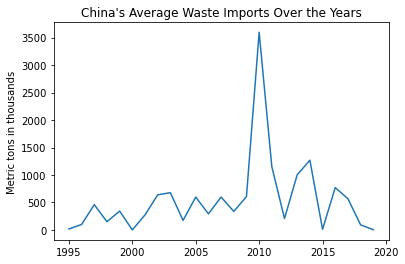

In [24]:
# Plot China's average waste imports.
imports = waste_china.loc[((waste_china['Flow'] == 1) & (waste_china['Economy'] == 156))|((waste_china['Flow']==2)&(waste_china['Partner']==156))].groupby('Year')['Metric tons in thousands'].mean()
print(imports)
plt.figure()
plt.plot(imports)
plt.title("China's Average Waste Imports Over the Years")
plt.ylabel('Metric tons in thousands')
plt.show()

In [25]:
waste_us = df_pt.loc[(df_pt['Product'] == 'P_05') & ((df_pt['Economy'] == 842)|(df_pt['Partner']==842))]
waste_us.head()

,Unnamed: 0,Year,Economy,Partner,Flow,Product,US dollars at current prices in thousands,US dollars at current prices in thousands Footnote,Metric tons in thousands,Metric tons in thousands Footnote
138812,8978,1995,32,842,2,P_05,796.340,NaN,1.880,NaN
187658,837346,1995,842,3208,1,P_05,2412.216,NaN,3.580,NaN
207987,577826,1995,3903,842,1,P_05,39.893,NaN,0.085,NaN
127792,216351,1995,2611,842,1,P_05,815.476,NaN,1.029,NaN
159706,1729824,1996,842,3916,2,P_05,125729.368,NaN,177.833,NaN


Year
1995      0.557000
1996     91.504200
1997     96.833571
1998    168.271125
1999     56.105333
2000    345.502333
2001     70.834000
2002    109.440750
2003    163.330000
2004     12.389250
2005      0.238600
2006    201.235556
2007     32.317500
2008      0.281500
2009    711.790667
2010    228.886250
2011    533.731167
2012     12.188000
2013      0.543000
2014    256.266000
2015     35.528500
2016    152.924667
2017     71.895833
2018    147.636500
2019     76.858167
2020      0.075500
Name: Metric tons in thousands, dtype: float64


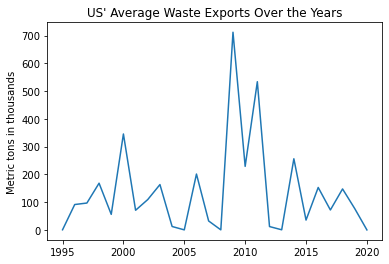

In [26]:
exports_us = waste_us.loc[((waste_us['Flow'] == 2) & (waste_us['Economy'] == 842))|((waste_us['Flow']==1)&(waste_us['Partner']==842))].groupby('Year')['Metric tons in thousands'].mean()
print(exports_us)
plt.figure()
plt.plot(exports_us)
plt.title("US' Average Waste Exports Over the Years")
plt.ylabel('Metric tons in thousands')
plt.show()

# 3. Trade Matrix Dataset

In [27]:
# Read in country code and product code
# country code is the name - label pair for the Economy/Economy Label and Partner/Partner Label
country_code = pd.read_csv('country_code.csv')
product_code = pd.read_csv('product_code.csv')

product_dic = dict(zip(product_code['SitcRev3Product'],product_code['SitcRev3Product Label']))
country_dic = dict(zip(country_code['Economy'],country_code['Economy Label']))

print(product_dic)
print(country_dic)

{571: 'Polymers of ethylene, in primary forms', 572: 'Polymers of styrene, in primary forms', 573: 'Polymers of vinyl chloride or halogenated olefins', 574: 'Polyethers, epoxide resins; polycarbonat., polyesters', 575: 'Other plastics, in primary forms', 579: 'Waste, parings and scrap, of plastics', 581: 'Tubes, pipes and hoses of plastics', 582: 'Plates, sheets, films, foil & strip, of plastics', 583: 'Monofilaments, of plastics, cross-section > 1mm'}
{0: 'World', 4: 'Afghanistan', 8: 'Albania', 12: 'Algeria', 16: 'American Samoa', 20: 'Andorra', 24: 'Angola', 28: 'Antigua and Barbuda', 31: 'Azerbaijan', 32: 'Argentina', 36: 'Australia', 40: 'Austria', 44: 'Bahamas', 48: 'Bahrain', 50: 'Bangladesh', 51: 'Armenia', 52: 'Barbados', 56: 'Belgium', 60: 'Bermuda', 64: 'Bhutan', 68: 'Bolivia (Plurinational State of)', 70: 'Bosnia and Herzegovina', 72: 'Botswana', 76: 'Brazil', 84: 'Belize', 90: 'Solomon Islands', 92: 'British Virgin Islands', 96: 'Brunei Darussalam', 100: 'Bulgaria', 104: '

In [30]:
'''
China code: 156
US code: 842
'''
trade_matrix = pd.read_csv('Trade_Matrix.csv')

In [31]:
df_ma = trade_matrix.sort_values(by='Year')

In [32]:
# China & US imports & outputs composition, by product category
df_ma_China = df_ma[df_ma['Economy'] == 156]
df_ma_US = df_ma[df_ma['Economy'] == 842]

# China import
df_ma_China_import = df_ma_China[df_ma_China['Flow']==1]
df_ma_China_import['usd_pct'] = df_ma_China_import['US dollars at current prices in thousands'] / \
                                df_ma_China_import.groupby('Year')['US dollars at current prices in thousands'].transform(np.sum)
df_ma_China_import = df_ma_China_import.groupby(['Year','SitcRev3Product']).sum().reset_index()
product_imp_dic = collections.OrderedDict()
for prod_label in df_ma_China_import['SitcRev3Product'].unique():
    product_imp_dic[prod_label] = 0
df_ma_China_import.head()
usd_pct_matrix = np.zeros(len(product_imp_dic))
for key, df in df_ma_China_import.groupby('Year'):
    tmp_dic = product_imp_dic.copy()
    print(tmp_dic)
    for prod, val in zip(df_ma_China_import['SitcRev3Product'],df_ma_China_import['usd_pct']):
        tmp_dic[prod] += val
    usd_pct_matrix = np.vstack([usd_pct_matrix,list(tmp_dic.values())])
    # print(usd_pct_matrix)
usd_pct_matirx = usd_pct_matrix[1:]

# plt.stackplot(df_ma_China_import['Year'].unique(),usd_pct_matirx.transpose())

OrderedDict([(571, 0), (572, 0), (573, 0), (574, 0), (575, 0), (579, 0), (581, 0), (582, 0), (583, 0)])
OrderedDict([(571, 0), (572, 0), (573, 0), (574, 0), (575, 0), (579, 0), (581, 0), (582, 0), (583, 0)])
OrderedDict([(571, 0), (572, 0), (573, 0), (574, 0), (575, 0), (579, 0), (581, 0), (582, 0), (583, 0)])
OrderedDict([(571, 0), (572, 0), (573, 0), (574, 0), (575, 0), (579, 0), (581, 0), (582, 0), (583, 0)])
OrderedDict([(571, 0), (572, 0), (573, 0), (574, 0), (575, 0), (579, 0), (581, 0), (582, 0), (583, 0)])


<ipython-input-32-c284a5378bc6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma_China_import['usd_pct'] = df_ma_China_import['US dollars at current prices in thousands'] / \


In [33]:
# Filter Waste Imports/Exports to China.
waste_ch = df_ma.loc[(df_ma['SitcRev3Product'] == 579) & ((df_ma['Economy'] == 156) | (df_ma['Partner'] == 156))]
waste_ch

,Unnamed: 0,Year,Economy,Partner,Flow,SitcRev3Product,US dollars at current prices in thousands
90594,90594,2016,156,2415,2,579,17516.362
90585,90585,2016,156,2415,1,579,926195.694
90603,90603,2016,156,2416,1,579,1519959.457
90612,90612,2016,156,2416,2,579,36818.623
90576,90576,2016,156,2413,2,579,20007.057
...,...,...,...,...,...,...,...
6534680,6534680,2020,156,3113,2,579,14483.122
6534610,6534610,2020,156,3108,2,579,1586.062
6534597,6534597,2020,156,3107,2,579,149.531
6534633,6534633,2020,156,3110,2,579,16580.251


Year
2016    340392.933178
2017    302740.283481
2018      5986.648155
2019       205.624128
2020       173.314074
Name: US dollars at current prices in thousands, dtype: float64


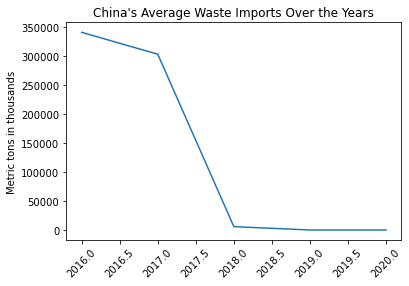

In [34]:
# Import Trends.
imports = waste_ch.loc[((waste_ch['Flow'] == 1) & (waste_ch['Economy'] == 156))|((waste_ch['Flow']==2)&(waste_ch['Partner']==156))].groupby('Year')['US dollars at current prices in thousands'].mean()
print(imports)
plt.figure()
plt.plot(imports)
plt.title("China's Average Waste Imports Over the Years")
plt.ylabel('Metric tons in thousands')
plt.xticks(rotation=45)
plt.show()

In [35]:
import_ch = waste_ch.loc[((waste_ch['Flow'] == 1) & (waste_ch['Economy'] == 156))|((waste_ch['Flow']==2)&(waste_ch['Partner']==156))]
before_countries = import_ch[(import_ch['Year'] < 2018) & (import_ch['Partner'].str.len() < 4)]
import_sum = before_countries.groupby(['Partner','Year'])['US dollars at current prices in thousands'].sum().sort_values(ascending=False)[:20].reset_index()
import_sum['Year'] = pd.to_datetime(import_sum['Year'], format='%Y')

import_sum['Year'] = import_sum['Year'].dt.year
import_sum

,Partner,Year,US dollars at current prices in thousands
0,344,2016,828818.583
1,344,2017,482397.059
2,392,2017,450901.516
3,392,2016,438873.272
4,842,2016,352852.709
5,842,2017,313060.055
6,764,2016,235664.556
7,764,2017,210787.367
8,276,2016,197195.080
9,608,2017,193799.312


In [44]:
country_code = pd.read_csv('country_code.csv')
country_code = country_code.drop(country_code.columns[0],axis=1)
country_code[country_code['Economy'] == 276]

,Economy,Economy Label
132,276,Germany


In [45]:
import_sum_country = import_sum.copy()
import_sum_country['Partner'] = import_sum_country['Partner'].astype(int)
import_sum_country = pd.merge(import_sum_country, country_code, left_on='Partner', right_on='Economy').drop(columns=['Economy'])
import_sum_country

,Partner,Year,US dollars at current prices in thousands,Economy Label
0,344,2016,828818.583,"China, Hong Kong SAR"
1,344,2017,482397.059,"China, Hong Kong SAR"
2,392,2017,450901.516,Japan
3,392,2016,438873.272,Japan
4,842,2016,352852.709,United States of America
5,842,2017,313060.055,United States of America
6,764,2016,235664.556,Thailand
7,764,2017,210787.367,Thailand
8,276,2016,197195.080,Germany
9,276,2017,167401.039,Germany


In [46]:
import_sum_country['Economy Label'].unique()

array(['China, Hong Kong SAR', 'Japan', 'United States of America',
       'Thailand', 'Germany', 'Philippines', 'Belgium', 'Australia',
       'Indonesia', 'Canada', 'Korea, Republic of'], dtype=object)

Text(0.5, 1.0, 'Top Countries China Imports Plastic Wastes from')

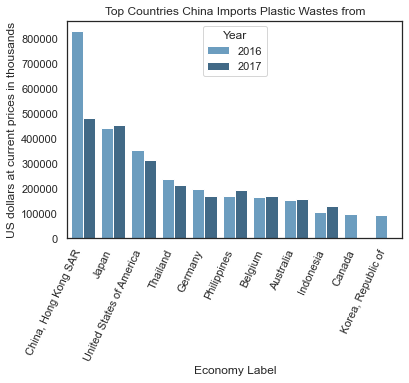

In [47]:
sns.set(style="white")
ax = sns.barplot(y="US dollars at current prices in thousands", x='Economy Label',data=import_sum_country, palette="Blues_d",hue='Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')
ax.set_title('Top Countries China Imports Plastic Wastes from')

# 4. Pollution Dataset

In [48]:
import pandas as pd
# Load dataset of improperly treated wastes of countries.
df_waste = pd.read_csv('MUNW_19112021011221217.csv')
df_waste = df_waste[['Country', 'Variable', 'Year','Unit','PowerCode', 'Reference Period', 'Value', 'Flags']]
df_waste

,Country,Variable,Year,Unit,PowerCode,Reference Period,Value,Flags
0,Australia,Landfill,2003,Tonnes,Thousands,NaN,6202.000,NaN
1,Australia,Landfill,2007,Tonnes,Thousands,NaN,7903.000,NaN
2,Australia,Landfill,2008,Tonnes,Thousands,NaN,7875.000,NaN
3,Australia,Landfill,2009,Tonnes,Thousands,NaN,7847.000,NaN
4,Australia,Landfill,2010,Tonnes,Thousands,NaN,7892.000,NaN
...,...,...,...,...,...,...,...,...
2871,Finland,Other disposal,2016,Tonnes,Thousands,NaN,3.941,NaN
2872,Finland,Other disposal,2017,Tonnes,Thousands,NaN,4.550,NaN
2873,Finland,Other disposal,2018,Tonnes,Thousands,NaN,4.113,NaN
2874,Finland,Other disposal,2019,Tonnes,Thousands,NaN,5.523,NaN


In [49]:
df_waste['Variable'].unique()

array(['Landfill', 'Incineration without energy recovery',
       'Total Incineration', 'Other disposal'], dtype=object)

In [50]:
sum(df_waste['Value'].isna())

0

In [51]:
df_waste['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Brazil', 'Chile',
       "China (People's Republic of)", 'Estonia', 'Israel', 'Slovenia',
       'Colombia', 'Latvia', 'Costa Rica', 'India', 'Lithuania'],
      dtype=object)

In [54]:
# Load Recycling dataset.
df_recyc = pd.read_csv('MUNW_19112021011414858.csv')
df_recyc = df_recyc[['Country', 'Year','Unit','PowerCode', 'Value']]
df_recyc

,Country,Year,Unit,PowerCode,Value
0,Australia,2003,Tonnes,Thousands,2701.00
1,Australia,2007,Tonnes,Thousands,4831.00
2,Australia,2008,Tonnes,Thousands,5082.00
3,Australia,2009,Tonnes,Thousands,5333.00
4,Australia,2010,Tonnes,Thousands,5502.00
...,...,...,...,...,...
888,Russia,2008,Tonnes,Thousands,6635.73
889,Russia,2009,Tonnes,Thousands,6735.85
890,Russia,2010,Tonnes,Thousands,8029.98
891,Russia,2011,Tonnes,Thousands,6086.15


# 5. Y_Value (annual Plastic Pollution by country)

In [55]:
df1['Country'] = df1['Country'].dropna().apply(lambda x: x[:-1] if x[-1] == "8" else x)
df1.loc[df1['Country'] == "Korea, South (Republic of Korea)",'Country'] = 'Korea'
df1.loc[df1['Country'] == "China (People's Republic of)",'Country'] = 'China'

In [56]:
y_value = df_waste.set_index('Country').join(df1.set_index('Country'), how = 'inner')
y_value = y_value[['Variable', 'Year', 'Unit', 'PowerCode', 'Value', '% Plastic in waste stream4']]
y_value['Plastic pollution by year'] = y_value['Value'] * y_value['% Plastic in waste stream4'] * 0.01
y_value.reset_index()
y_value = y_value.groupby(["Country", "Year"]).sum().reset_index()
y_value

,Country,Year,Value,% Plastic in waste stream4,Plastic pollution by year
0,Australia,2003,6202.0,4.95,306.9990
1,Australia,2007,7903.0,4.95,391.1985
2,Australia,2008,7875.0,4.95,389.8125
3,Australia,2009,7847.0,4.95,388.4265
4,Australia,2010,7892.0,4.95,390.6540
...,...,...,...,...,...
754,United States,2014,153522.0,38.85,19881.0990
755,United States,2015,155274.0,38.85,20107.9830
756,United States,2016,158268.0,38.85,20495.7060
757,United States,2017,158476.0,38.85,20522.6420


In [57]:
y_value

,Country,Year,Value,% Plastic in waste stream4,Plastic pollution by year
0,Australia,2003,6202.0,4.95,306.9990
1,Australia,2007,7903.0,4.95,391.1985
2,Australia,2008,7875.0,4.95,389.8125
3,Australia,2009,7847.0,4.95,388.4265
4,Australia,2010,7892.0,4.95,390.6540
...,...,...,...,...,...
754,United States,2014,153522.0,38.85,19881.0990
755,United States,2015,155274.0,38.85,20107.9830
756,United States,2016,158268.0,38.85,20495.7060
757,United States,2017,158476.0,38.85,20522.6420


In [63]:
iso3 = pd.read_csv('iso3.csv')
dic = dict(zip(iso3['alpha-3'],iso3['name']))

In [64]:
population = pd.read_csv('population.csv')

population = population[:860]
population['LOCATION'] = population['LOCATION'].apply(lambda x: dic[x])
population.set_index(['LOCATION','TIME']).reset_index()

population.loc[population['LOCATION'] == "United States of America",'LOCATION'] = 'United States'
population.loc[population['LOCATION'] == "United Kingdom of Great Britain and Northern Ireland",'LOCATION'] = 'United Kingdom'
population.loc[population['LOCATION'] == "Korea, Republic of",'LOCATION'] = 'Korea'

In [65]:
y_value = pd.merge(y_value, population,  how='inner', left_on=['Country','Year'], right_on = ['LOCATION','TIME'])
y_value = y_value[['Country','Year','% Plastic in waste stream4','Plastic pollution by year','Value_x','Value_y']]
y_value['plastic pollution per millions of people'] = y_value['Plastic pollution by year']/y_value['Value_y']
y_value

,Country,Year,% Plastic in waste stream4,Plastic pollution by year,Value_x,Value_y,plastic pollution per millions of people


# 6. Graphs

In [67]:
df = pd.read_excel('country.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [69]:
from matplotlib import pyplot as plt

In [70]:
df[df['Country'] == "China"]

data = pd.read_csv("trade_partner_p05_no_org.csv")

In [71]:
world2017import = data[(data['Flow'] == 1) & (data['Year'] == 2017)].groupby(['Economy Label']).mean().sort_values(by=['US dollars at current prices in thousands'],ascending=False)[:20].reset_index()
world2017import

,Economy Label,Unnamed: 0,Year,Economy,Partner,Flow,US dollars at current prices in thousands,Metric tons in thousands
0,China,2.516426e+07,2017.0,156.0,455.912281,1.0,28784.044333,51.486456
1,Bahamas,2.510890e+07,2017.0,44.0,685.000000,1.0,8145.735000,0.928500
2,"China, Hong Kong SAR",2.585395e+07,2017.0,344.0,428.687500,1.0,5915.383732,16.869277
3,Netherlands,2.614758e+07,2017.0,528.0,460.187500,1.0,4496.615625,13.007917
4,Mexico,2.607546e+07,2017.0,484.0,363.200000,1.0,4409.070600,8.116000
5,United States of America,2.633735e+07,2017.0,842.0,405.625000,1.0,3619.025250,6.104431
6,Germany,2.547169e+07,2017.0,276.0,442.152542,1.0,3368.823119,9.256966
7,Ireland,2.589407e+07,2017.0,372.0,538.800000,1.0,2727.803640,3.782760
8,Italy,2.590039e+07,2017.0,380.0,444.615385,1.0,2586.128846,4.341231
9,Belgium,2.511810e+07,2017.0,56.0,464.568627,1.0,2167.479882,3.979216


Text(0.5, 1.0, '2017 import value by top 20 countries')

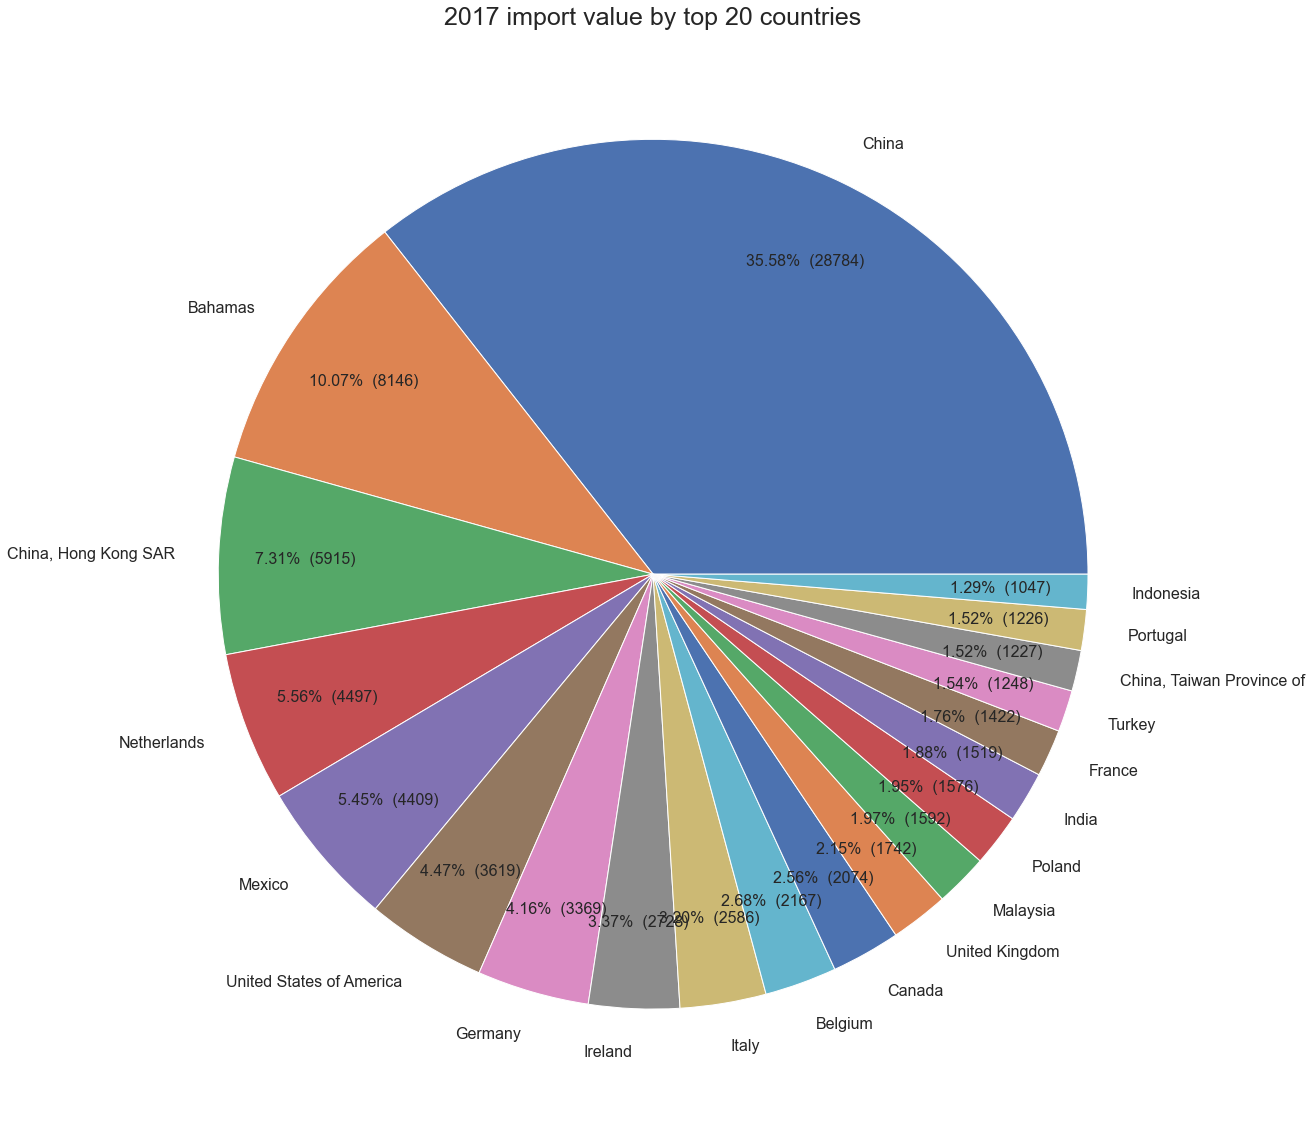

In [72]:
from matplotlib.pyplot import figure
from matplotlib import pyplot
fig = pyplot.figure()

# Sets the height and width of the figure 
fig.set_figheight(20)
fig.set_figwidth(20)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# This adds a "subplot" to the figure class, where you can specify the type of plot and any axes
ax1 = fig.add_subplot()
ax1.pie(world2017import['US dollars at current prices in thousands'],labels = world2017import\
        ['Economy Label'],autopct=make_autopct(world2017import['US dollars at current prices in thousands']),pctdistance=0.8,textprops={'fontsize': 16})
ax1.set_title('2017 import value by top 20 countries',fontsize=25)

In [74]:
world2018import = data[(data['Flow'] == 1) & (data['Year'] == 2018)].groupby(['Economy Label']).mean().sort_values(by=['US dollars at current prices in thousands'],ascending=False)[:20].reset_index()
world2018import

,Economy Label,Unnamed: 0,Year,Economy,Partner,Flow,US dollars at current prices in thousands,Metric tons in thousands
0,Bahamas,2.637838e+07,2018.0,44.0,530.000000,1.0,9616.746000,13.376500
1,United States of America,2.760253e+07,2018.0,842.0,410.454545,1.0,3621.955078,5.892260
2,Netherlands,2.741548e+07,2018.0,528.0,455.035714,1.0,3563.204179,9.944804
3,Germany,2.673903e+07,2018.0,276.0,425.293103,1.0,3346.557414,8.633207
4,"China, Hong Kong SAR",2.712361e+07,2018.0,344.0,443.325581,1.0,2832.933337,6.954047
5,Ireland,2.716338e+07,2018.0,372.0,453.035714,1.0,2746.311179,3.208071
6,Mexico,2.734419e+07,2018.0,484.0,343.000000,1.0,2618.952250,7.068375
7,"China, Taiwan Province of",2.643326e+07,2018.0,158.0,431.112500,1.0,2451.789000,5.410950
8,Malaysia,2.733381e+07,2018.0,458.0,433.701299,1.0,2383.974208,11.343896
9,Indonesia,2.713876e+07,2018.0,360.0,464.847826,1.0,2353.912348,7.212457


Text(0.5, 1.0, '2018 import value by top 20 countries')

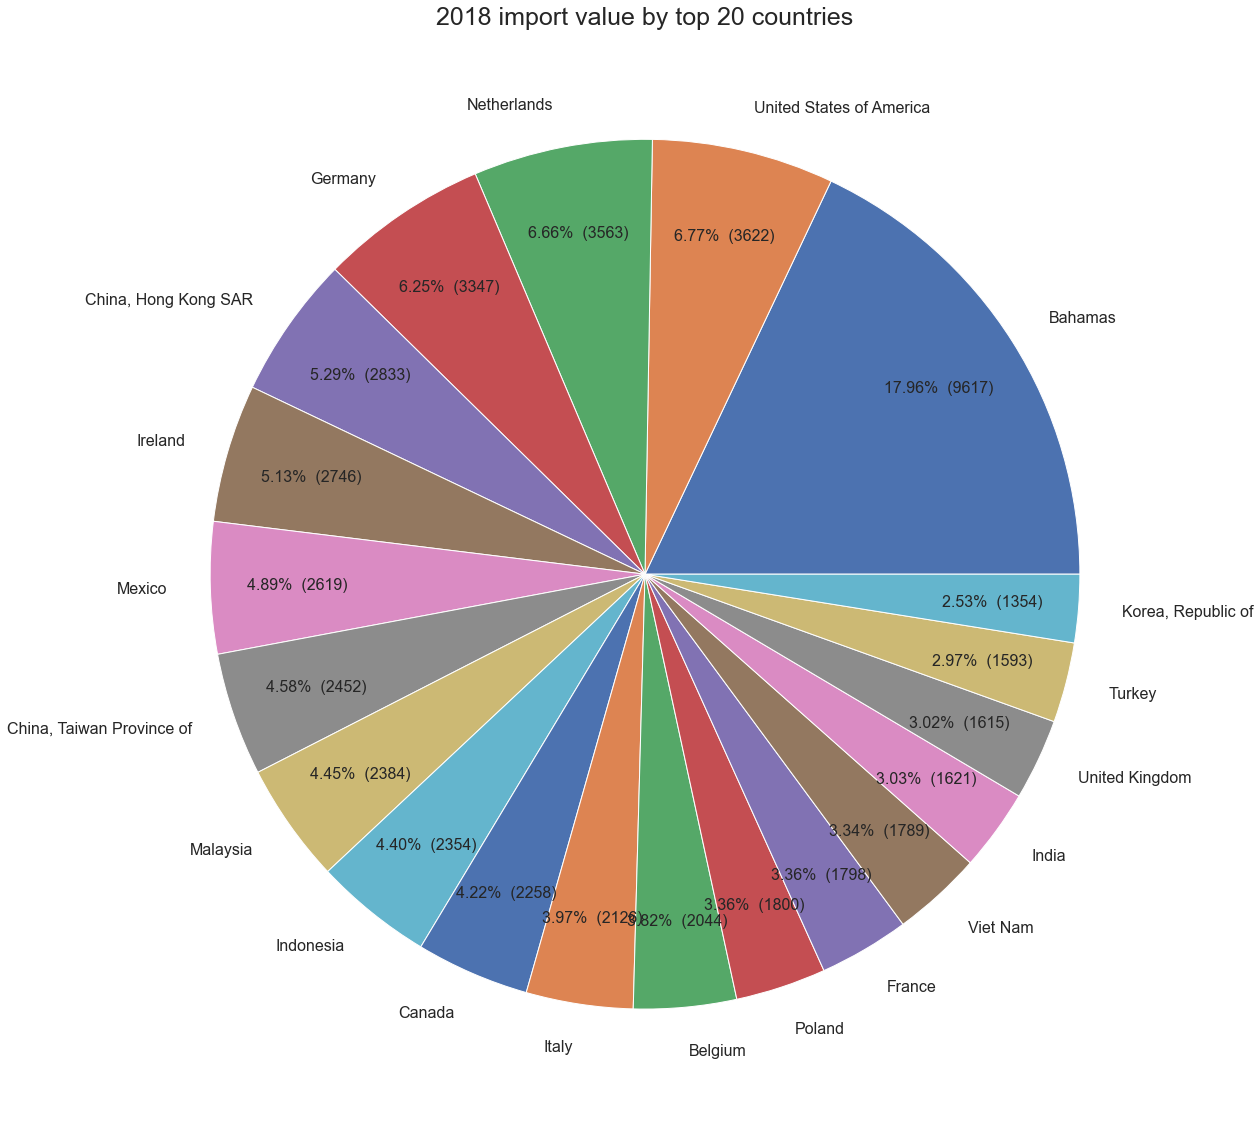

In [75]:
from matplotlib.pyplot import figure
from matplotlib import pyplot
fig = pyplot.figure()

# Sets the height and width of the figure 
fig.set_figheight(20)
fig.set_figwidth(20)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# This adds a "subplot" to the figure class, where you can specify the type of plot and any axes
ax1 = fig.add_subplot()
ax1.pie(world2018import['US dollars at current prices in thousands'],labels = world2018import\
        ['Economy Label'],autopct=make_autopct(world2018import['US dollars at current prices in thousands']),pctdistance=0.8,textprops={'fontsize': 16})
ax1.set_title('2018 import value by top 20 countries',fontsize=25)

In [76]:
data[(data['Economy Label'] == 'China') & (data['Flow'] == 2)].groupby(['Partner Label','Year']).mean().sort_values(by=['US dollars at current prices in thousands'],ascending=False)[:100]

Unnamed: 0  Economy  Partner  Flow  \
Partner Label            Year                                       
United States of America 2015  22623432.0    156.0    842.0   2.0   
Oman                     2020  28887534.0    156.0    512.0   2.0   
United States of America 2014  21363988.0    156.0    842.0   2.0   
Singapore                2019  27689908.0    156.0    702.0   2.0   
                         2018  26430770.0    156.0    702.0   2.0   
...                                   ...      ...      ...   ...   
Brazil                   2017  25161885.0    156.0     76.0   2.0   
China, Hong Kong SAR     1996    888807.0    156.0    344.0   2.0   
Australia                2015  22619307.0    156.0     36.0   2.0   
India                    2020  28886779.0    156.0    356.0   2.0   
Indonesia                2020  28886790.0    156.0    360.0   2.0   

                               US dollars at current prices in thousands  \
Partner Label            Year                                              
United States of America 2015                                  20762.438   
Oman                     2020                                  18327.810   
United States of America 2014                                  18097.191   
Singapore                2019                                  17255.696   
                         2018                                  16051.711   
...                                                                  ...   
Brazil                   2017                                   1689.081   
China, Hong Kong SAR     1996                                   1685.478   
Australia                2015                                   1632.649   
India                    2020                                   1557.000   
Indonesia                2020                                   1553.167   

                               Metric tons in thousands  
Partner Label            Year                            
United States of America 2015                    10.918  
Oman                     2020                     3.235  
United States of America 2014                    12.495  
Singapore                2019                     3.441  
                         2018                     2.554  
...                                                 ...  
Brazil                   2017                     0.127  
China, Hong Kong SAR     1996                     4.556  
Australia                2015                     1.075  
India                    2020                     0.646  
Indonesia                2020                     0.599  

[100 rows x 6 columns]

In [77]:
china_import = data[(data['Economy Label'] == 'China') & (data['Flow'] == 1)].groupby('Year').sum().\
loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]
china_export = data[(data['Economy Label'] == 'China') & (data['Flow'] == 2)].groupby('Year').sum().\
loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]

In [78]:
df_waste['Variable'].unique()

array(['Landfill', 'Incineration without energy recovery',
       'Total Incineration', 'Other disposal'], dtype=object)

In [79]:
china_import

,US dollars at current prices in thousands,Metric tons in thousands
Year,,
1995,113301.097,545.111
1996,43794.796,224.207
1997,84626.118,466.900
1998,116670.317,665.813
1999,260358.836,1423.270
2000,513789.739,2096.356
2001,553305.867,2313.216
2002,567890.988,2551.300
2003,810432.547,3142.009


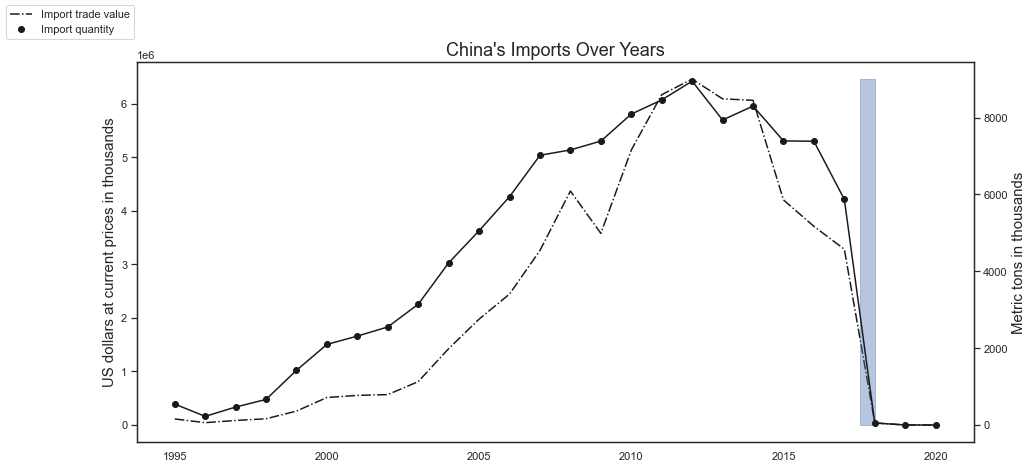

In [87]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize = (15,7))
ax.plot(china_import['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(china_import['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(china_import['Metric tons in thousands'],'k')
plt.fill_betweenx([0,9000], 2017.5, 2018, color='b', alpha=.4)
plt.title("China's Imports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
labels = []
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

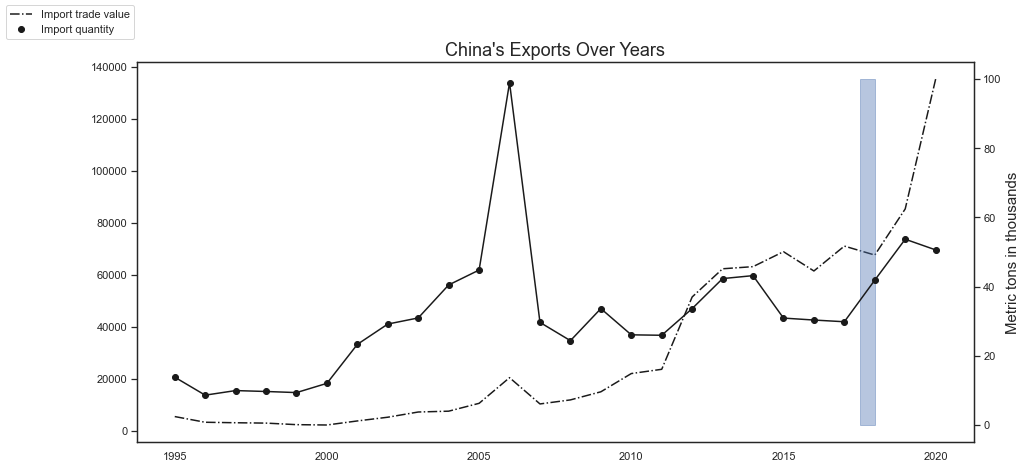

In [88]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(china_export['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(china_export['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(china_export['Metric tons in thousands'],'k')
plt.fill_betweenx([0,100], 2017.5, 2018, color='b', alpha=.4)
plt.title("China's Exports Over Years",fontsize=18)
ax2.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
labels = []
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

In [89]:
Japan_import = data[(data['Economy Label'] == 'Japan') & (data['Flow'] == 1)].groupby('Year').sum().\
loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]
Japan_export = data[(data['Economy Label'] == 'Japan') & (data['Flow'] == 2)].groupby('Year').sum().\
loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]

In [90]:
USA_import = data[(data['Economy Label'] == 'United States of America') & (data['Flow'] == 1)].groupby('Year').sum().\
loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]
USA_export = data[(data['Economy Label'] == 'United States of America') & (data['Flow'] == 2)].groupby('Year').sum().\
loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]

In [91]:
Germany_import = data[(data['Economy Label'] == 'Germany') & (data['Flow'] == 1)].groupby('Year').sum().\
loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]
Germany_export = data[(data['Economy Label'] == 'Germany') & (data['Flow'] == 2)].groupby('Year').sum().\
loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]

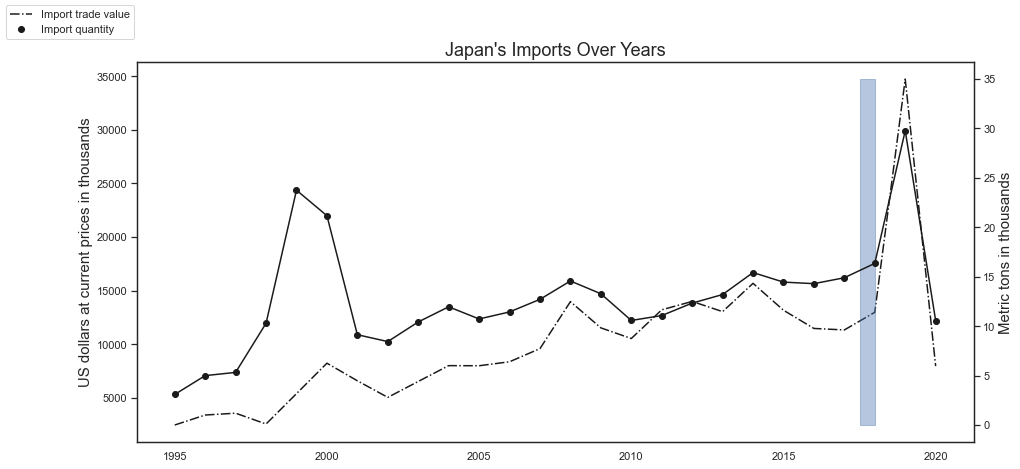

In [92]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(Japan_import['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(Japan_import['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(Japan_import['Metric tons in thousands'],'k')
plt.fill_betweenx([0,35], 2017.5, 2018, color='b', alpha=.4)
plt.title("Japan's Imports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

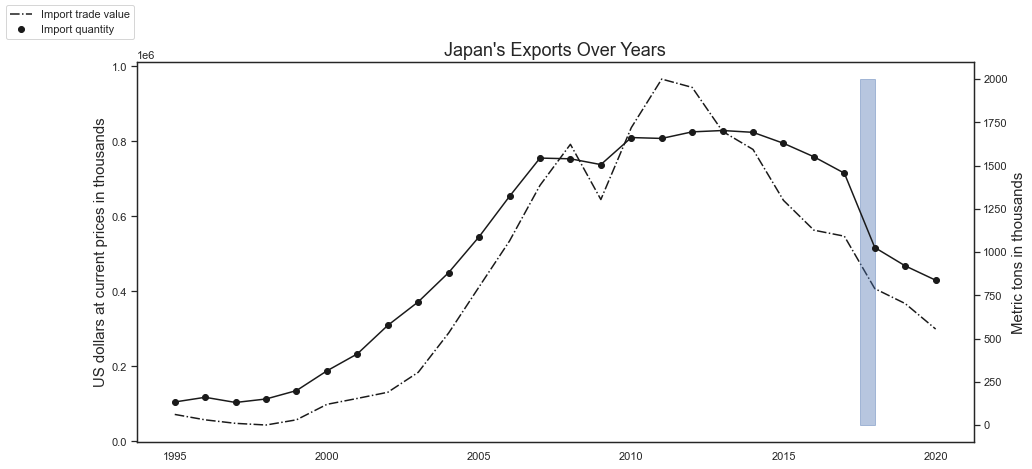

In [93]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(Japan_export['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(Japan_export['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(Japan_export['Metric tons in thousands'],'k')
plt.fill_betweenx([0,2000], 2017.5, 2018, color='b', alpha=.4)
plt.title("Japan's Exports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

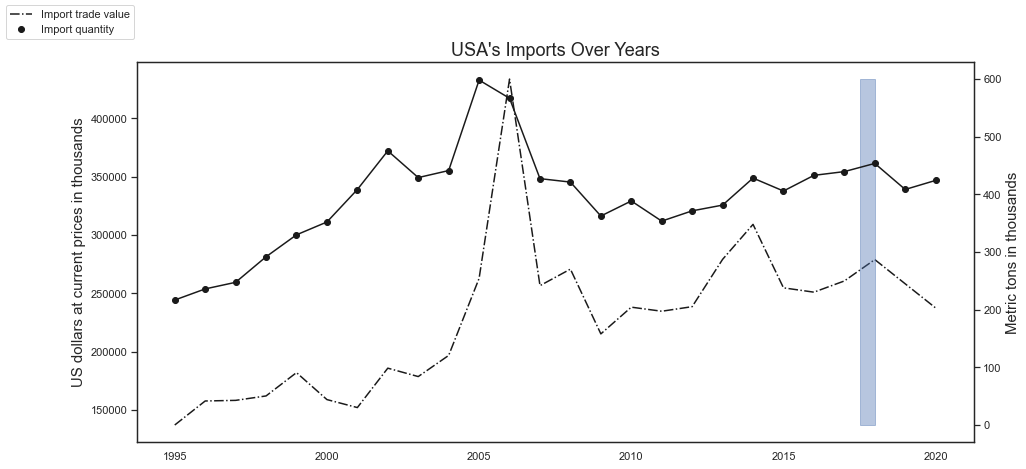

In [94]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(USA_import['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(USA_import['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(USA_import['Metric tons in thousands'],'k')
plt.fill_betweenx([0,600], 2017.5, 2018, color='b', alpha=.4)
plt.title("USA's Imports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

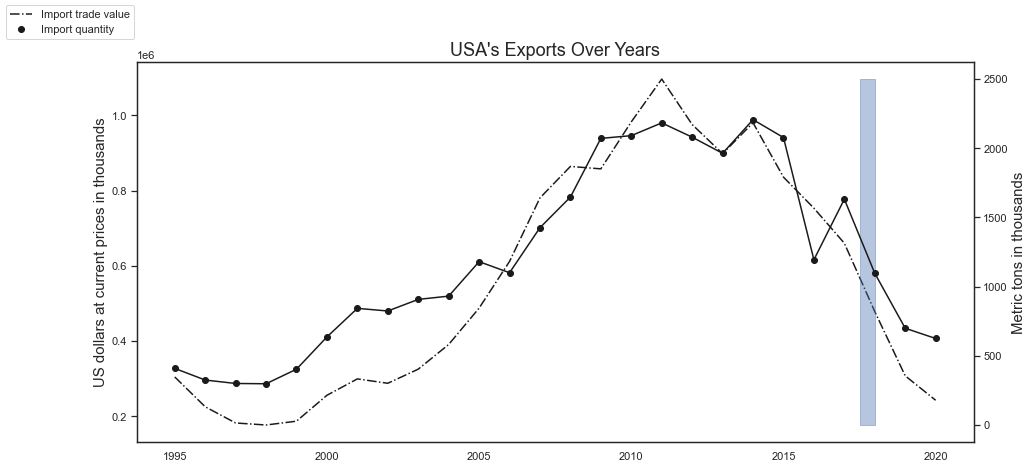

In [95]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(USA_export['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(USA_export['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(USA_export['Metric tons in thousands'],'k')
plt.fill_betweenx([0,2500], 2017.5, 2018, color='b', alpha=.4)
plt.title("USA's Exports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

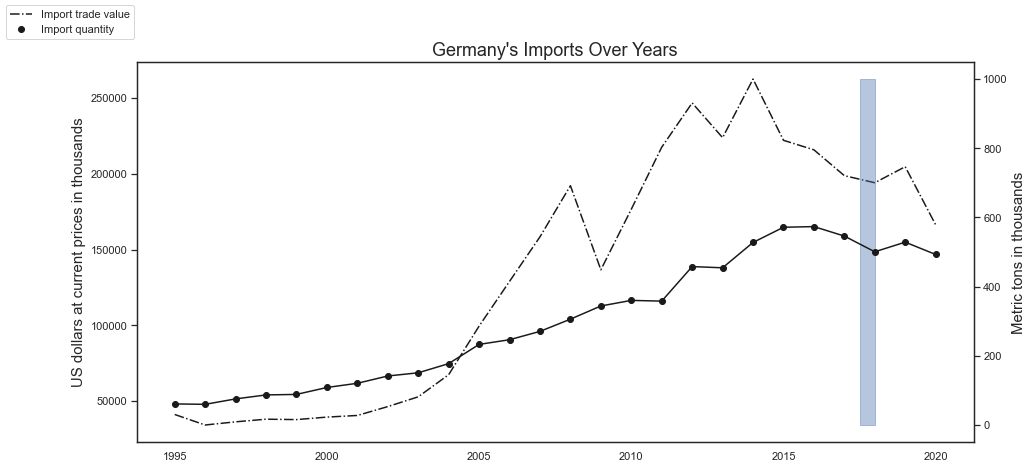

In [96]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(Germany_import['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(Germany_import['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(Germany_import['Metric tons in thousands'],'k')
plt.fill_betweenx([0,1000], 2017.5, 2018, color='b', alpha=.4)
plt.title("Germany's Imports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

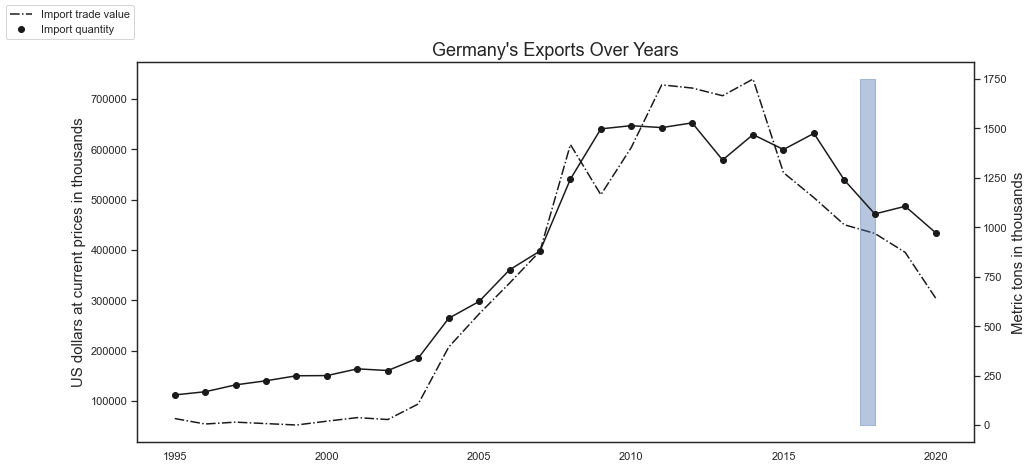

In [97]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(Germany_export['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(Germany_export['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(Germany_export['Metric tons in thousands'],'k')
plt.fill_betweenx([0,1750], 2017.5, 2018, color='b', alpha=.4)
plt.title("Germany's Exports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

In [98]:
world_import = data[data['Flow'] == 1].groupby('Year').sum().loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]
world_export = data[data['Flow'] == 2].groupby('Year').sum().loc[:,['US dollars at current prices in thousands','Metric tons in thousands']]

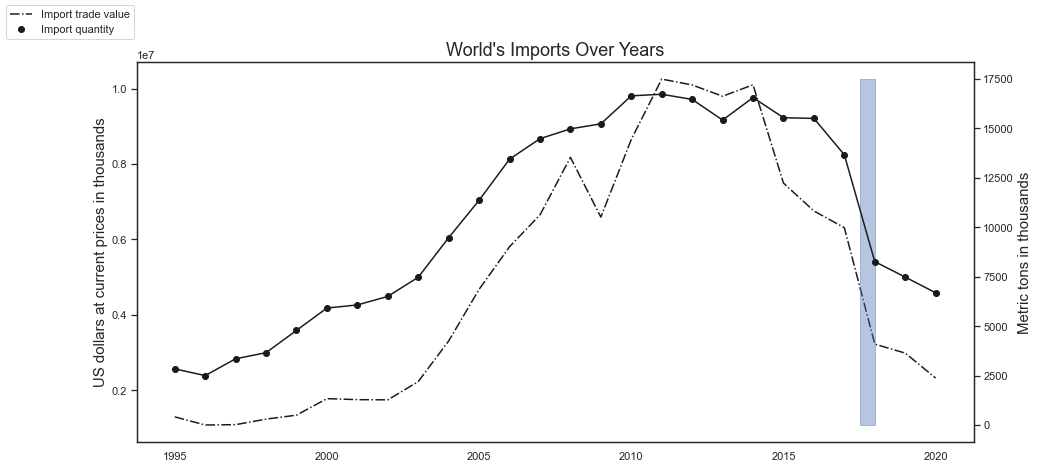

In [99]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(world_import['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(world_import['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(world_import['Metric tons in thousands'],'k')
plt.fill_betweenx([0,17500], 2017.5, 2018, color='b', alpha=.4)
plt.title("World's Imports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()

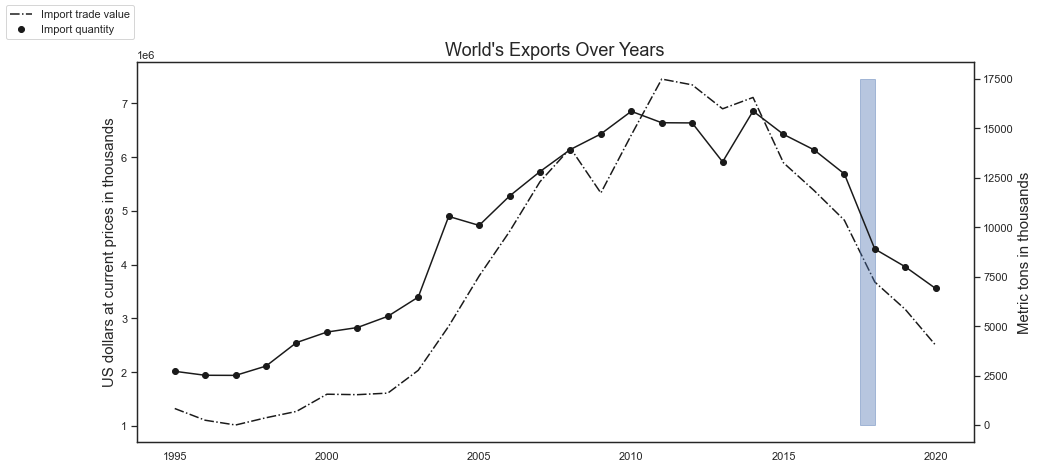

In [100]:
fig,ax = plt.subplots(figsize = (15,7))
ax.plot(world_export['US dollars at current prices in thousands'],'k-.',label="Import trade value")
ax2=ax.twinx()
ax2.plot(world_export['Metric tons in thousands'],'ko', label = 'Import quantity')
ax2.plot(world_export['Metric tons in thousands'],'k')
plt.fill_betweenx([0,17500], 2017.5, 2018, color='b', alpha=.4)
plt.title("World's Exports Over Years",fontsize=18)
ax.set_ylabel('US dollars at current prices in thousands',fontsize=15)
ax2.set_ylabel('Metric tons in thousands',fontsize=15)
for ax in fig.axes:
    Label = ax.get_legend_handles_labels()
    labels.extend(Label)
fig.legend(loc=2)
plt.show()